In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
df=pd.read_csv('Downloads/banking.csv')

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [19]:
# checking if there are null values are present or not
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [20]:
# checking the data type
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [21]:
df.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [22]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [23]:
df.default.unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [24]:
df.contact.unique()

array(['cellular', 'telephone'], dtype=object)

In [25]:
df.month.unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep',
       'dec'], dtype=object)

In [26]:
df.day_of_week.unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [28]:
df.poutcome.unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [35]:
# As we can see that many columns are in objects.Lets do label encoding for that column
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
df.poutcome=label_encoder.fit_transform(df['poutcome'])
print('poutcome:',df.poutcome.unique())

poutcome: [1 2 0]


In [36]:
df.day_of_week=label_encoder.fit_transform(df['day_of_week'])
print('day_of_week:',df.day_of_week.unique())

day_of_week: [2 0 3 1 4]


In [37]:
df.month=label_encoder.fit_transform(df['month'])
print('month:',df.month.unique())

month: [1 7 4 0 3 6 8 5 9 2]


In [39]:
df.contact=label_encoder.fit_transform(df['contact'])
print('contact:',df.contact.unique())

contact: [0 1]


In [40]:
df.default=label_encoder.fit_transform(df['default'])
print('default:',df.default.unique())

default: [1 0 2]


In [41]:
df.education=label_encoder.fit_transform(df['education'])
print('education:',df.education.unique())

education: [0 7 6 3 2 5 1 4]


In [42]:
df.job=label_encoder.fit_transform(df['job'])
print('job:',df.job.unique())

job: [ 1  9  4  7  5  0  3 10  2  6 11  8]


In [44]:
df.marital=label_encoder.fit_transform(df['marital'])
print('marital:',df.marital.unique())

marital: [1 2 0 3]


In [45]:
df.housing=label_encoder.fit_transform(df['housing'])
print('housing:',df.housing.unique())

housing: [2 0 1]


In [46]:
df.loan=label_encoder.fit_transform(df['loan'])
print('loan:',df.loan.unique())

loan: [0 2 1]


In [47]:
# checking data type of the column
df.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int64
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

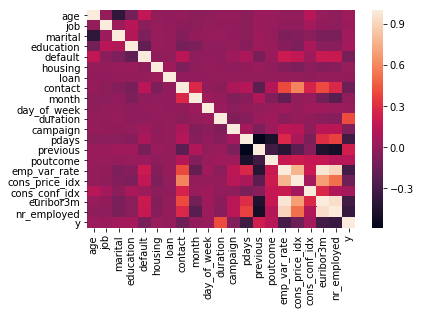

In [53]:
# Checking the coorelation between the columns
#plt.subplots(figsize=(10,10))
sns.heatmap(df.corr())

In [54]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [55]:
# Description of the dataset
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,...,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,...,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## Target variable - y

In [62]:
X=df.drop(['y'],axis=1)
Y=df.y

In [63]:
# Normalizing the values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_std=scaler.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## By using LogisticRegression

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(x_std,Y,test_size=0.2,random_state=1)

In [67]:
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7654
           1       0.42      0.67      0.52       584

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.70      0.80      0.73      8238
weighted avg       0.93      0.91      0.92      8238



In [72]:
confusion_matrix(y_pred,Y_test)

array([[7110,  544],
       [ 191,  393]], dtype=int64)

In [69]:
print('accuracy_score:',accuracy_score(y_pred,Y_test))

accuracy_score: 0.9107793153678078


## By using RandomForest

In [73]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf=RandomForestClassifier(n_estimators=50)
# train random forest classifier
rf.fit(X_train,Y_train)
# predicting the response of the test data
y_pred=rf.predict(X_test)


In [77]:
print('accuracy_score:',accuracy_score(y_pred,Y_test))

accuracy_score: 0.9180626365622724


## By using SVM

In [86]:
# importing SVM classifier
from sklearn.svm import SVC
svm=SVC()
# train SVM classifier
clf_svm=svm.fit(X_train,Y_train)
# predicting the response of the test data
y_pred=svm.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [87]:
accuracy_score(y_pred,Y_test)

0.9123573682932751

## By using Decision Tree

In [88]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [89]:
clf=DecisionTreeClassifier()
# training the decision tree classifier
clf.fit(X_train,Y_train)
# predicting the response of the test dataset
y_pred=clf.predict(X_test)

In [90]:
accuracy_score(y_pred,Y_test)

0.8911143481427531

In [91]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [100]:
# create decision tree classifier object
clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)
# train decision tree classifier
clf=clf.fit(X_train,Y_train)
# predict the response for the test dataset
y_pred=clf.predict(X_test)
# testing the accuracy,how often the classifier is correct?
print('accuracy_score:',accuracy_score(Y_test,y_pred))

accuracy_score: 0.9084729303228939


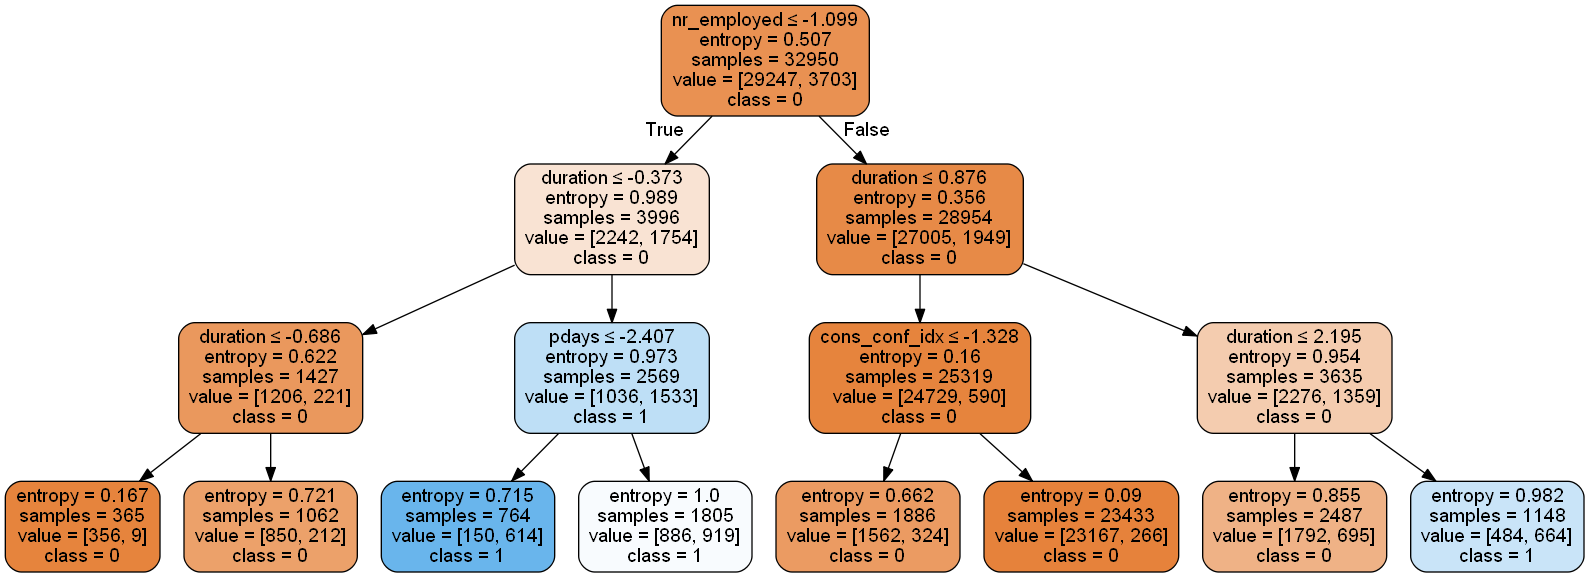

In [101]:
dot_data=StringIO()
export_graphviz(clf,
               out_file=dot_data,
               filled=True,
               rounded=True,
               special_characters=True,
               feature_names=X.columns,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())